<a href="https://colab.research.google.com/github/aoc-ptctech/allinone2022/blob/main/jcplessis/Day_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [502]:
import itertools
import numpy as np
from matplotlib.patches import Polygon

class Piece:
  def __init__(self, initial_position, height, width):
    self.position = initial_position
    self.height = height
    self.width = width

  def would_be_in_collision(self, other_pieces):
    my_positions = self.used_positions()
    for other_piece in other_pieces[-100:]:
      their_positions = other_piece.used_positions()
      if len([value for value in my_positions if value in their_positions]) > 0:
        return True
    return False
    
  def move(self, direction, other_pieces):
    old_position = self.position
    x, y = self.position
    if direction == ">":
      self.position = (min(x+1, 7-self.width), y)
    if direction == "<":
      self.position = (max(x-1, 0), y)
    if direction == "v":
      if y == 0:
        return False
      self.position = (x, y-1)

    if self.would_be_in_collision(other_pieces):
      self.position = old_position
      if direction == "v":
        return False
    return True

  def draw(self, plot):
    pass

class Plus(Piece):
  marker = "+"

  def __init__(self, initial_position):
    super().__init__(initial_position, 3, 3)
   
  def used_positions(self):
    x, y = self.position
    return [
        (x+1, y),
        (x,   y+1),
        (x+1, y+1),
        (x+2, y+1),
        (x+1, y+2)
    ]

  def draw(self, plot):
    x, y = self.position
    x, y = self.position
    pts = np.array([
        (x+1,y),
        (x+2,y),
        (x+2,y+1),
        (x+3,y+1),
        (x+3,y+2),
        (x+2,y+2),
        (x+2,y+3),
        (x+1,y+3),
        (x+1,y+2),
        (x,y+2),
        (x,y+1),
        (x+1,y+1)
    ])
    p = Polygon(pts, fill=True, edgecolor="black",  facecolor="black")
    plt.gca().add_patch(p)

class HorizontalLine(Piece):
  marker = "_"
  
  def __init__(self, initial_position):
    super().__init__(initial_position, 1, 4)

  def used_positions(self):
    x, y = self.position
    return [
        (x, y),
        (x+1, y),
        (x+2, y),
        (x+3, y)
    ]

  def draw(self, plot):
    x, y = self.position
    pts = np.array([
        (x,y),
        (x+4,y),
        (x+4,y+1),
        (x,y+1)
    ])
    p = Polygon(pts, fill=True, edgecolor="red",  facecolor="red")
    plt.gca().add_patch(p)
    

class VerticalLine(Piece):
  marker = "|"
  
  def __init__(self, initial_position):
    super().__init__(initial_position, 4, 1)

  def used_positions(self):
    x, y = self.position
    return [
        (x, y),
        (x, y+1),
        (x, y+2),
        (x, y+3)
    ]

  def draw(self, plot):
    x, y = self.position
    pts = np.array([
        (x,y),
        (x+1,y),
        (x+1,y+4),
        (x,y+4)
    ])
    p = Polygon(pts, fill=True, edgecolor="green",  facecolor="green")
    plt.gca().add_patch(p)

class Corner(Piece):
  marker = "o"
  
  def __init__(self, initial_position):
    super().__init__(initial_position, 3, 3)

  def used_positions(self):
    x, y = self.position
    return [
        (x, y),
        (x+1, y),
        (x+2, y),
        (x+2, y+1),
        (x+2, y+2)
    ]

  
  def draw(self, plot):
    x, y = self.position
    pts = np.array([
        (x,y),
        (x+3,y),
        (x+3,y+3),
        (x+2,y+3),
        (x+2,y+1),
        (x,y+1)
    ])
    p = Polygon(pts, fill=True, edgecolor="yellow",  facecolor="yellow")
    plt.gca().add_patch(p)
    
class Square(Piece):
  marker = "s"
  
  def __init__(self, initial_position):
    super().__init__(initial_position, 2, 2)

  def used_positions(self):
    x, y = self.position
    return [
        (x, y),
        (x, y+1),
        (x+1, y),
        (x+1, y+1)
    ]

  def draw(self, plot):
    x, y = self.position
    pts = np.array([
        (x,y),
        (x+2,y),
        (x+2,y+2),
        (x,y+2)
    ])
    p = Polygon(pts, fill=True, edgecolor="blue",  facecolor="blue")
    plt.gca().add_patch(p)

    

class Tetris:
  def __init__(self, jets):
    self.pieces = []
    self.jets = itertools.cycle(self.add_down_move(jets))
    self.pieces_order = itertools.cycle([HorizontalLine, Plus, Corner, VerticalLine, Square])
    self.falling_piece = None
    self.start_position = 3

  def add_down_move(self, jets):
    result = []
    for jet in jets:
      result.append(jet)
      result.append("v")
    return result

  def next_start_position(self):
    return (2, self.start_position)

  def step(self):
    if self.falling_piece == None:
      piece = next(self.pieces_order)
      self.falling_piece = piece(self.next_start_position())
    else:
      next_move = next(self.jets)
      #print(f"Next move {len(self.pieces)} {self.falling_piece.position} -> {next_move}")
      if not self.falling_piece.move(next_move, self.pieces):
        #print(f"Piece settled {len(self.pieces)} {self.falling_piece.position}")
        self.pieces.append(self.falling_piece)
        self.falling_piece = None
        self.start_position = self.stack_height() + 3
    
  def run_pieces(self, count):
    while len(self.pieces) < count:
      self.step()


  def stack_height(self):
    result = 0
    for positions in  [piece.used_positions() for piece in self.pieces]:
      for position in positions:
        result = max(result, position[1])
    return result + 1


  def to_visualisation(self):
    height = self.stack_height() + 3
    result = np.empty((7, height), dtype='unicode_')
    result.fill("")
    for piece in self.pieces:
      for position in piece.used_positions():
        result[position] = piece.marker
    return result

  def draw(self, plot):
    for piece in self.pieces:
      piece.draw(plot)

  

In [468]:
import unittest

example = """>>><<><>><<<>><>>><<<>>><<<><<<>><>><<>>"""

class TestAcceptance(unittest.TestCase):

    def test_compute_next_position(self):
      position = Tetris(example).next_start_position()
      self.assertEqual((2, 3), position)

    def test_create_piece(self):
      tetris = Tetris(example)
      tetris.step()
      self.assertTrue(isinstance(tetris.falling_piece, HorizontalLine))
      self.assertEqual((2, 3), tetris.falling_piece.position)
      tetris.step()
      self.assertEqual((3, 3), tetris.falling_piece.position)
      tetris.step()
      self.assertEqual((3, 2), tetris.falling_piece.position)
      tetris.step()
      self.assertEqual((3, 2), tetris.falling_piece.position)
      tetris.step()
      self.assertEqual((3, 1), tetris.falling_piece.position)
      tetris.step()
      self.assertEqual((3, 1), tetris.falling_piece.position)
      tetris.step()
      self.assertEqual((3, 0), tetris.falling_piece.position)
      tetris.step()
      self.assertEqual((2, 0), tetris.falling_piece.position)

    def test_wall_collision(self):
      tetris = Tetris("<<<<")
      tetris.step()
      self.assertEqual((2, 3), tetris.falling_piece.position)
      tetris.step()
      tetris.step()
      self.assertEqual((1, 2), tetris.falling_piece.position)
      tetris.step()
      tetris.step()
      self.assertEqual((0, 1), tetris.falling_piece.position)
      tetris.step()
      tetris.step()
      self.assertEqual((0, 0), tetris.falling_piece.position)

    def test_wall_collision(self):
      tetris = Tetris(">>>>")
      tetris.step()
      self.assertEqual((2, 3), tetris.falling_piece.position)
      tetris.step()
      tetris.step()
      self.assertEqual((3, 2), tetris.falling_piece.position)
      tetris.step()
      tetris.step()
      self.assertEqual((3, 1), tetris.falling_piece.position)
      tetris.step()
      tetris.step()
      self.assertEqual((3, 0), tetris.falling_piece.position)

    def test_floor_collision(self):
      tetris = Tetris(">>>>")
      tetris.step()
      self.assertEqual((2, 3), tetris.falling_piece.position)
      tetris.step()
      tetris.step()
      self.assertEqual((3, 2), tetris.falling_piece.position)
      tetris.step()
      tetris.step()
      self.assertEqual((3, 1), tetris.falling_piece.position)
      tetris.step()
      tetris.step()
      self.assertEqual((3, 0), tetris.falling_piece.position)
      tetris.step()
      tetris.step()
      self.assertEqual((3, 0), tetris.pieces[0].position)
      self.assertEqual(None, tetris.falling_piece)
      tetris.step()
      self.assertEqual((2, 4), tetris.falling_piece.position)
      self.assertTrue(isinstance(tetris.falling_piece, Plus))

    def test_other_piece_collision(self):
      tetris = Tetris(">>>>")
      [tetris.step() for i in range(9)]
      self.assertEqual((3, 0), tetris.pieces[0].position)
      self.assertEqual(None, tetris.falling_piece)
      tetris.step()
      self.assertEqual((2, 4), tetris.falling_piece.position)
      self.assertTrue(isinstance(tetris.falling_piece, Plus))
      tetris.step()
      tetris.step()
      self.assertEqual((3, 3), tetris.falling_piece.position)
      tetris.step()
      tetris.step()
      self.assertEqual((4, 2), tetris.falling_piece.position)
      tetris.step()
      tetris.step()
      self.assertEqual((4, 1), tetris.falling_piece.position)
      tetris.step()
      tetris.step()
      self.assertEqual(None, tetris.falling_piece)
      self.assertEqual((4, 1), tetris.pieces[1].position)
      
      
    def test_used_positions(self):
      positions = HorizontalLine((2, 4)).used_positions()
      self.assertEqual([(2, 4), (3, 4), (4, 4), (5, 4)], positions)
      positions = Plus((2, 4)).used_positions()
      self.assertEqual([(3, 4), (2, 5), (3, 5), (4, 5), (3, 6)], positions)
      positions = Corner((2, 4)).used_positions()
      self.assertEqual([(2, 4), (3, 4), (4, 4), (4, 5), (4, 6)], positions)
      positions = VerticalLine((2, 4)).used_positions()
      self.assertEqual([(2, 4), (2, 5), (2, 6), (2, 7)], positions)
      positions = Square((2, 4)).used_positions()
      self.assertEqual([(2, 4), (2, 5), (3, 4), (3, 5)], positions)

    def test_run_pieces(self):
      tetris = Tetris(example)
      tetris.run_pieces(5)
      self.assertEqual((2, 0), tetris.pieces[0].position)
      self.assertEqual((2, 1), tetris.pieces[1].position)
      self.assertEqual((0, 3), tetris.pieces[2].position)
      self.assertEqual((4, 3), tetris.pieces[3].position)
      self.assertEqual((4, 7), tetris.pieces[4].position)


    def test_run_2022_pieces(self):
      tetris = Tetris(example)
      tetris.run_pieces(2022)
      self.assertEqual(3068, tetris.stack_height())

unittest.main(argv=[''], verbosity=2, exit=False)

test_compute_next_position (__main__.TestAcceptance) ... ok
test_create_piece (__main__.TestAcceptance) ... ok
test_floor_collision (__main__.TestAcceptance) ... ok
test_other_piece_collision (__main__.TestAcceptance) ... ok
test_run_2022_pieces (__main__.TestAcceptance) ... ok
test_run_pieces (__main__.TestAcceptance) ... ok
test_used_positions (__main__.TestAcceptance) ... ok
test_wall_collision (__main__.TestAcceptance) ... ok

----------------------------------------------------------------------
Ran 8 tests in 9.568s

OK


In [469]:
#@title Define my input
input = """>>><><<>>><<><<>>>><<<<>>><<<<><>>><>>>><<>>>><<<>>>><<>>><>>><<>>><>>><>>>><<>>>><<<>><>>><<<><<><>><<><>><<>>>><<>>><>>>><<<<>><<<>><<>>><<>><<<>>>><>>>><<<<><<<<>>><<<<>>><<<><<<>><<<<>>>><<<<>>><<<<>><>>><<<<>>><><<<>>>><><<<<>>><<<>><<<<>><<<>>>><<>><<<<>>>><<<><<>>><<>>>><>>><<>>><<>>><>>>><<<>>><<>>><<>>><>>>><<<<><<><<<><<><<<>>><<<>>>><>><<<>>><<<>><<<><<<<>>>><<<<>>><<<>><>>><>>>><<<>>>><>>>><<<<>>>><<<<><<<<><<<<>>><>>>><<<>><<<<>>><<<><<<>>>><<>>>><<<<>>><<<>><<<<><<<><<>>>><<<>>><>>><><<<>>><>><<<>><<>><<<>><<<>>>><<<<><<<<>>>><<>>><><<<>><<>><<>>>><<<><>><<<>><<<<>>>><<>><<<><<<<>><<>>><<<>><<><<<<>>>><<<<><<<<><<<><<<><<<<>><<<>><<<<>>>><><>>>><<<<><>><<>>><<>><>>><<>><<>>>><>><<<><>>><<<<>>><<>>><>><>>><<>><<<><<<<>>>><>>>><>>><<<>>><<<<>>><<<<>>><<<>>>><<<>><<<><>>>><<<<>><<<<><<<>>><<>>>><<><><<<><<<>><<<>>>><<<><<<<>>>><<<<>>>><><>>><>>>><<><<><<>><<><<<><<<<>>><>>>><<>>><>>>><<<>>>><<>>>><<<>><<<<><<><<<>>>><<<<>><<<>>>><>>><><<<<>>><<<><<>><<>>>><<>>>><>><<<>>>><>><<<<>>><<<>><>>>><<>><><<>>><<>><<>><<<><>>><<<>>>><>>>><<><<<<><<<<>>>><<<<>><<<>><<<>><<<>><<><<<<>>><<>>>><><>><<<<>>>><<>>>><>>>><<>>><<<<>><<><<<><<<<><<><<<<><<>>>><<<<>>>><>>>><<>>><<><<><>>>><>><<<<>><<>>>><<>>>><<<<>>>><<<<>><<<<>>>><<<>>><<>>><<><<<<>><>><<<>>><<<>>><>>>><>><>>>><<<<>><<<>>>><<>>><>><<<<>>><>><<<>>><<><<><<<<>>><<<<>>><<<<>>><<>><<>>><<>><<>><><<<<><<<>><><<<<>>>><<<><<<<>>>><<<>>><>><<<><<<>>><<<<>>><<<<>>><<>>><<<>>>><<<>>><<><<<>>><<>>><<>>><<>>>><<<>>><>><<>><<<>>><<<<>>>><>><<><<>>><<<>>><<<>><<<<>>>><<<<><<>>><<<>>><<>>>><<<>>>><>><<<<>>>><>>><<<<><<<>>>><>>><<>>><<><<>><<<><<<>>>><>>>><>>>><<<<>>><<<>>><<<>>>><<>>>><>><<<><>><<<>><<<>>>><<<>>><>>>><<<<><<<<>><>>>><<><<<>>><<><<<>>>><<<<>>>><<<<>>><<<<><>>>><<><>>><<>>><<>>><>><<<>><<<<>><<<<>><<>>><<><<>><<<>><<><<><>>><<<<><<<<>>>><>><<>>><<><<<<>>>><<<>><<<>>>><<<<>>><<<<>>><>>><<>><<<<>>>><<<>>><<><<<<>>>><<<<>>>><><<<>>><<<><<<>>><<<<><<<>>><<<>><<><>>>><><<>><<><<><<<>><>>>><>>>><>>>><<<<>>>><<>><<<><<<<><<>><><<<>><<<<>><<<<>>><<<>>>><<<<>><<<<>>>><<<<><>><<>>><<<<><>>>><<>>>><<<<>><>>>><><<<>><>>><<><><><<<>>>><<<>>><<><<<<>>>><>><<>>>><>>>><<<<>>>><<<<>>>><<<>>>><<<>><>><<<<><<<<>>>><>><<<><<>><<>>>><>><<><<<>>><<<><>>>><<>><<<<>>>><<<><<<><<<<>>><<>>>><>><<<<>>><<<>>><<<<><>>><>>><>>><>>><<>><<<>><<<>>><<<>><><<<<>><<<<><<>><>><<<>><<><>>><><<>>><<<<>>>><<<<>>>><>><<>>>><<<<>>><<>>>><<<<>>><<<<>>>><<>>>><><>><><<>><<<<>><>><<<<>>><>>><<<>>><<<<>>>><<>><<<>><<<<>>><<<<>>><<<<>>><<<<><<><><>>>><<<>>>><<<<>><<>>>><>><<><<<<><<<>><<<<><<>>><<<>>><><<<<>><<>>>><<<>><<<>>><<<>>><<<<><>>>><<<><<<><<<<>>><<<<><>>><>>><<>>>><<<>>>><<><<><<>><<>><<><>>><<<>>><<><<><<<<>><<<<>><<<>>>><>>>><<<<>>><>>><<<<>><<><<>>>><<<<>>>><>><>>><<<<>>><<<><<>><<><<>><>>><>><<>>><<<<>>>><<<>><<<>>><<>>>><<>><<<<>>>><<<>>>><<>><<<>>><<<><<<>><<<<>>>><<<>><<<<><<<<>>>><><>>><<><<>>><><<>>>><<<>>><<>>>><<<<><>>><<<<>>>><<<<>>>><>>><<>><<<>>>><<>>><<<><>>><<>>><<>>><<>>>><>>>><<>><>><<>>><<<>>>><<<>>><<<>><<<<><<<>>>><<>>><<<<><<<>>><><<<<><<>>><<<<>>><<>>><><<<<>>><>>>><>>>><<>>><<<>>>><>>>><<<>>><<<><<<><<<<><<>>>><<<<>><<>>>><<<>>><><<><<<<><<<><<<>><<<<>>>><<>><<>><<<>><<>><<<>>><<<<>><<<<>><<<>><<<<>>>><<>>>><><<<<>><>>>><<>>>><<<><<><>><<<>>>><<<>>><<><>>>><<<<><<<><<<<>>>><<>><<<<><<<<>>>><<>>>><<>>><<><>>>><><<<>>><<>><>><<<<>>>><<<>>>><<<>>><<<<>>><<<<>>>><<<>><<<<><<<<>>><>><<<>><<><<>><><<<>>>><>>>><<><<<<>>>><<<><<<<>>><<><>>>><>>><><<<<>>><><<<>>><<>>>><>>>><>>>><<<<><<>><>><<<><<<<><<>><>>>><>><<<>>><>>><<>>><<>><<<>>>><<<<>>>><<<>><<>><<>><>>>><<<<>><<>><<>><<<>><<>><<>>>><>>>><<>><<<<>>><<<<><<<>>><<><>>>><<<>><<<>>>><<<>><><>>><<<>><><>>>><<>><<<>>>><><>>><<>>><>>>><>>><<<>><<>>>><<>>>><<><<<>>><<><<<<>><<>><>>>><><<<>>>><<<<>><<<>><<<<>><<>><><<<<>>>><<><<<>><><<<<>>>><>>>><<<<>><>>><<<<>>>><>>>><>>>><><<<>><<<>>>><<<><<<>>><<<<>>>><<>>><<><<<<>>>><<<>><<<<><<<>>><<<>><<>>><<>><<>><<>>>><<<>><<>>><<<<>><>><<<>><<<<>>>><<<>>><>><<>>>><<<<>>>><<<><<>>><<>>><<<><<<<><<>>><<<<><<>>>><<<>>><<<>>>><<>>><<<>>><<>>><<<>><<<<>>>><><<<>>><>>>><<>><<<<>>>><<<>>>><>><<<>><<<><<><<<<>><<<<>>><<<<><<<<>>><<<<><<>><<>>><<<>><<<<>>><<<>><>>><<<<>><<<<><<><>>><<<<><<<>>>><<<<>><<<<>>>><<>>>><<>>>><<><<>>>><<<>>><<<<>><<>>>><<<<><<>>><<>><<><>>>><<>>>><<<>><<<>>><<><><<<<><<>>>><>>>><<<>>><><<<<>>>><<>>>><<<<><>><<>>>><>>>><<<<>>><>><<>><<<>>><<<><<<<>>>><<<<><<<>>>><<><>>><<<>>>><<><>>>><<<>><<>>>><<<<>><<<><<>>>><<>>><>>><>>>><<>>>><<<><>>>><<>>><<<<>>>><<>>><<<<>><<<<><>>><<>><>>><<><<<>><>>><<<<>><<>>><<><<<>><<<>>><<<<>>>><<>>><>><<><>>>><><><>>>><<>>>><<<>><<<<>>>><<>>>><<>>>><>>>><<>>>><<<<>><<>>>><<>><<<<>>><<<><>>>><<<>>><<<>><><>>>><>><<<<>>>><<><>>><<>>>><<>>>><<<>><<<>><><>><<>>>><<<>><<<>>><<>><<<<>>><<<<>>><>>>><<<><>><<<>><<><>>>><<<<>>><>>>><>>>><>>><>><>>><<<<>>>><>>>><>><<<<>><<<>><<<>>><>>><>>><<<><<<><<<<>>><<<<><<>><><>>><>>>><>>><><>>>><><<<><>>><<<<>>>><<>>>><><>>>><<>>>><>>>><<<>>><<><>><>>><>>><<<<><<<<>>><<<<><<<>>>><<<>><<>>><<<<>>><<><<<<>>>><>><<<<><><><<<><>>><<<>>>><<<>>><<<<>><<>>><<>><<<<>><>>>><<<><<>>><<>>>><>>><<<>>><<<>>>><<<<>>>><>>><<<><>>>><<<>>>><<>><<<>>><>>>><<<>>><<<><<<><<<<>><<<>>><<<>>><<<<>>>><<<<>>>><<<<>>>><<<<>><<<>><<>><<>>>><<><<>>>><><<<>><><<<><>>><<<<>>>><<>>><<>>>><<<<><>>><><<<>><<<><<>>>><<<>>><<<<>>>><<<<>>>><<<>>>><<<>><<<>>>><>><<<>>><<<>>>><<>>>><<<>>><<<<>>>><>><><<<<>>><<<>><<>><<>>>><<>><><<<<>>><<<>>>><><<>>>><<<>><<><<>><>>>><<<<>>><<<<><<>>>><<<>>><<<<>>>><>>><><<<>>><<<<>>>><<<>><<<<>>>><>>>><<<>>>><>>><<<<>>>><<>>>><><>><>><<<>><<>>>><<<>>><<>>>><<<><<<<>><<<<>><<<<>>>><<<><>><<<>>>><<>>><<<<>>><>>>><<<<>><>>><>>><<<>>>><<>>>><<<<><><<<>><><<><><><<<><<><<<<><<<<>>>><<<>>>><<<>>>><<<<><<>>>><<<><<>>>><<<>><<<<><<<>>><>>><>>><<<<>>><><<>><>>><<<<>>>><<>>><<<>>><<<>><<<<>>>><>><<>>>><<<>>>><<<><><<<>><<<>><<>><>>>><<>><<<>>>><<>>><<<>>><<><>><<>><>>><<>>><><<<>>>><<>>>><<>><>><>>><<<<><<<<>>><<<>>>><>>>><<<<>><>><<<>>>><<<<><<<<>><<>>>><<<<><<<<>>><<<><<>>><<><>><>>>><>>><<<<>>>><<>><>>>><<<>>><>>>><>>>><<<>><<>>><<<<>><<<<>>><>>><<<<>>>><>><<<<>>>><<<<>>><<<>><<>>><<<<>>>><>>><>><<>>><<<>>><><>><<<>><><>><<<><<<>><<<>>><<>>><<<>><<><<<<>>>><<<<>>><<<>><<>><<<<>><<<>>>><>>><<<>>><<<<>>><><<>><>><>><<<>>><<<<>><<<><<><<<<>>>><<>>><<<<>>><<<><<<>><<<>>>><<<<>><<><>><<<><<<>>>><<<<>><<<>>>><><<<<>>><<<>><>><>>><<><<<<><>><<>>>><>>>><>><<<<>>>><<<>>><<<<>>>><>><<><<>><<<<>>>><<<><>>>><<<<>>>><><<<><<<<>>>><<<<>>><<<>>><<>><<>>>><><>>>><<<>><<<<>>>><<<>><<<>><<<>><<<>>><><<<<><>>><<<<>>>><<<>><><<<>>><<><<>>>><<><<>>><<<>><<<<>>>><>>><><<<<>>>><<<>>>><<<<>>><>><<>>>><><<<<>>><<<>>><<>>><<<><<<>>>><>>>><<<<><<<<>><<<<>><<<<>>><<><>>><<<>><>><<<>>><><>>><>><<><<><<><<<<><<<><<><>>>><<>>><<<<>><<<>><<>>><<<<>><<<>>><<>>>><<>><<<<><<<<>><<<<>><<>><>>>><<<<>>>><<<<><<<><<<<>>>><<<<>>>><<<>>><<<>>>><<>>>><<>>>><<<>>>><<<>>>><<<>><>><<<<>>><<<><>><<<><<<<>>>><<<>><>>><<<>>>><<<<>><<<>>>><>>><<<>>>><<>>><<<<>><<<<>>>><<<>><<>><>>><>>>><<<<>>><<<<>>><<<><<>>><<<>>>><<<<>>><><<><<<<><>>>><>>><<<<>>>><>>>><<<<><<>><<>>><><>>><<<>>><<<><<<<>>>><<>>>><>>>><<>>><<>>>><<<><><<<><<<>><<<>>><<<<>><<<<><<<>><<<>><<<>><<<>>>><>>><<>><<<<>><<<<><<>>>><<>><<><<<><<<<>>><>>><<<>>>><<<<>>><<<<>>>><><<<>>>><>><<<><<><<<<>>>><><<>>>><<<>><<<<>>>><<>>><<>>>><<<>><<<<><<<<>><<<<>>>><<<>><<<<>>><><<><>>>><><<<<>>>><<<><<>>>><<<<>>><>><<<<>>>><<>><<<><<<>>>><<>>><<>>>><<<<>>>><<<><<><<<<>><<<>>>><><<><<<<>>>><<>>>><<<<>>><>>>><><<<>>>><<>><>>><<>>><<<<><<<>>><>>><<><>><<<<>>>><<<<>><<<>>><<<<><<<>>><<<><>>>><<>>>><<<<>>>><<<<>><<<><<>><>>><<<>>>><<<<>>>><<<<><<>>>><>><<<<>>><<><<>>>><><<<<>>><<<<>><<<><<<<>><<<<>>>><<><<<><<>>>><><<><<<>><<<<>><<<><<<>>><<<<>>><<><>><<<>>>><<>><<>>>><<><<>><<<<>><<<<>><><>>>><<<<>>>><<>>><<<>><<<<><<><>>>><<<>>><<>>>><<<<>>><<<><<>><<<>>>><<>>><>>>><<<<><<<>>>><<<>><>>>><<<<>><><<<><<<>>>><<<>>><<>>><<><>>>><<<><<<<>>><<<><<>><<<>>><><<><<><<>><<<>>><<<<><<>><<<>><>>><<<>><<<<>><><<><><<<<><<<>>>><<>><>>>><<<><<>><<<<>>><<<>>><<>><>>>><<<>><<>><><<<<>>>><<<>>>><>><<<><><>><<<<><<<>>>><<<>>><<<<>>>><><>>>><><<<<>><<<><<>>>><<<>>>><<>>>><>>>><<><>>>><>><<<<>>><<><<<<>>>><<>>>><<>>><<<<>><<<><>>><<>>><>><<><<><<<<><<<<><<><<<<><>>><>>>><<<>><<<<>><<<<>><<<>>><>>>><<<>>>><>>><<<<>>><>>>><<<><<<>>>><>>>><<<<>>><>>><<>>>><>>><<>>>><<<<>>>><<<<>>>><<<>><>>>><<>>>><>><><<>>>><>><<><<<<>>><<<<>>><<<<>>>><<>><<<<>>>><<<<>><<>><>><<<>><>><<>>>><<<<><<<<><<>>><<<<>><<>>><<<>>><<<<>>>><<><<<>>>><<<<>>><<<>><>>>><<<>>><<<<>>>><<<<>><<<<>>>><<<>>>><<>><<<<>>>><>>><<<<>><<<<><>>>><<<>>><>>>><<>><>>><<<>>><>>>><<<>><<><>><<>>>><>><<<<><<><<<<>>>><>><<>>>><<>><<<<>><<<<>>><<<<>>><<>>><>><<><>><<>>>><<<<>><<>>>><<<<>>>><>>><<<>>>><>>><>>><<><<<<>>>><>><<><<>>><>>>><<>>>><<>><>>>><<><<>>>><<>><<>>>><<<>><<><>>><<<<><<<><>><<><><<<>><<<<>>>><<<<>><<<>>>><<<<>>><<<<><<<<>>><<<<><<<><<<>>><<>>>><<>><><<>>><<<<>>>><<<<><<>>>><>><<>>>><<>><>>>><<<>>>><<<<>><<>><>>><<<<>>>><<<<>>><<>><<<>>>><<<><><<>>>><>>><<<>>>><<<>><<<<>>>><<>>><<>>><><<<<>>><<<>>><<<<>><>><<<><<<<>>>><>><<<<>>><<><<<>>><<<<>><>>><><<>>>><<>>>><<>><<><<<>><<<<>><><><>><<<>>><<><<<<>>><<>>>><<<>>>><>>>><>>>><<<<>>><<<<>>>><<<<>><>>><<>><<>><<>><<<>>><>>><><<<>>><<<<><<<><><<><<<>><<<<>>>><<<>>><>>>><<<>>><<<<>>>><<<<>><<<<>>><>>><>>><<>>><<>>>><>>><<<<>>><<><<<>>><<<<><<<>>><<<<>>><<><<<>>>><<<>><<<<>>><<<<>>>><<<><<<<><<<>>><<<>>>><<<<>>><>>>><<<<>>><<>>><<<>>>><<<<>>><<><<>>><<>>><><<><<<>>>><>>>><<<<>>><<<<>>><>>><<>>><<>>>><><<<<>>><<<><<<<>>>><<<><<<><<>>>><<<>>><<<<>>><<<>>>><<<><<<<>>>><<<>><<>>><<<<>><<>>>><<<<>>><>><<<<>>>><<>>>><>><<><<<>><>>>><<>>><<<><<>><>>><<<<><<<>><<<<>>><<>>><<<>>>><<<>><<<><<><<><<>>>><>>><<>>><<<<>><<<<>>><<<>>><<><>><>>><<><<<>>>><<<><>><<<><<<<>><<<>>>><<>>><>>><<<>>>><<>>><<<><<<<>>><>><<>>><><<><<<<>>><<<>>>><<<<>><<<>>>><><>>>><>><<>>><><><<>>>><<<>>>><<<<><<<>>><<<<><>>>><<><><<>>>><><<<<>>>><><<<<>>>><>>>><<<<>>><<<><<<>><<<><<<>>>><<<<><<<>>><<<>>><>>><>>>><<><>>>><<>>><<>>><<>><<<<><<>>>><<>>><<<><<<>><<<<>>>><>>>><<<>>><<>>>><<>>>><<<>>><<><<<>>><<<<>>><<<><>>><<<>>><>>>><<>><<<<>>>><<<<>>><<<>><<<<><"""


In [470]:

tetris = Tetris(input)
tetris.run_pieces(2022)

print(f"After 2022 pieces, my stack is {tetris.stack_height()} units high") 
#print(f"The best random scenario I found with the help of an elephant gets {path.total_flow} pressure out")


After 2022 pieces, my stack is 3055 units high


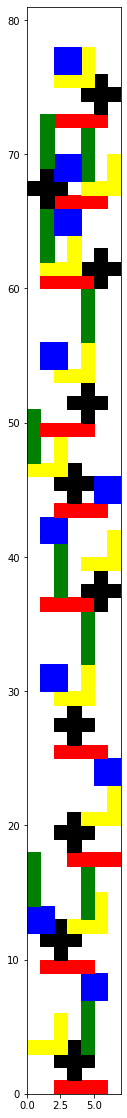

In [511]:
#@title Représentation de la grotte
import numpy as np
import matplotlib.pyplot as plt

tetris = Tetris(example)
tetris.run_pieces(50)
vis = tetris.to_visualisation()


tetris.draw(plt)
plt.xlim(0, 7)
plt.rcParams["figure.figsize"] = (20,20)
plt.ylim(0, tetris.stack_height() + 3)
plt.gca().set_aspect('equal')
plt.show()